In [1]:
# example of loading the generator model and generating images

from numpy import load
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D

from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot


# load and prepare training images
def load_real_samples():
    # load the face dataset
    data = load('img_align_celeba.npz')
    X = data['arr_0']
    # convert from unsigned ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [-1,1]
    X = (X - 127.5) / 127.5
    # load labels
    labels = load('img_align_celeba_labels.npz')
    Y = labels['arr_0']
    return X, Y

def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]

    return X

def define_encoder(dimension):
    model = Sequential(name="sequential_encoder")
    # normal
    model.add(Conv2D(128, (4,4), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 40x40
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 20x30
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 10x10
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 5x5
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # classifier
    model.add(Flatten())
    model.add(Dense(dimension))
    return model

def define_model(generator, encoder):
    model = Sequential()
    generator.trainable = False
    model.add(encoder)
    model.add(generator)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model


def train(model, dataset, n_epochs=50, n_batch=128):
    bat_per_epo = dataset.shape[0] // n_batch
    # manually enumerate epochs
    for i in range(n_epochs):
        total_loss = 0
        # enumerate batches over the training set
        for data,index in dataset:
            # get randomly selected samples
            loss = model.train_on_batch(data, data)
            total_loss+=loss
            print(i+1,j+1,loss)
        print(i+1, total_loss)
    return

In [ ]:
# load model
batch_size = 128
generator = load_model('generator_model_2.h5')
dataset = preprocess.load_images(batch_size = batch_size)

encoder = define_encoder(200)
model = define_model(generator, encoder)
train(model,dataset, n_batch = batch_size)
model.layers[0].save('encoder_model_2.h5')

In [116]:
origin = generate_real_samples(dataset, 2)
example = (model.predict(origin)+1)/2

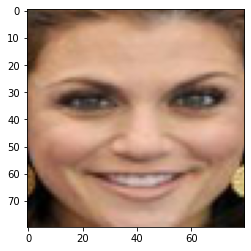

In [117]:
pyplot.imshow((origin+1)[0]/2)

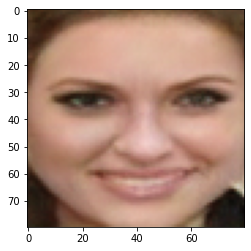

In [118]:
pyplot.imshow(example[0])